In [2]:
import pandas as pd
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler


import datetime
import random
from datetime import timedelta

from sklearn.preprocessing import StandardScaler, RobustScaler

from core.composer.gp_composer.gp_composer import \
    GPComposer, GPComposerRequirements
from core.composer.visualisation import ComposerVisualiser
from core.repository.model_types_repository import ModelTypesRepository
from core.repository.quality_metrics_repository import \
    ClassificationMetricsEnum, MetricsRepository
from core.repository.tasks import Task, TaskTypesEnum
from core.utils import probs_to_labels
from examples.utils import create_multi_clf_examples_from_excel


import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as roc_auc
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from benchmark.benchmark_utils import get_scoring_case_data_paths
from core.composer.chain import Chain
from core.composer.node import PrimaryNode, SecondaryNode
from core.models.data import InputData

random.seed(1)
np.random.seed(1)



def get_model(train_file_path: str, cur_lead_time: datetime.timedelta = timedelta(minutes=100)):
    task = Task(task_type=TaskTypesEnum.classification)
    dataset_to_compose = InputData.from_csv(train_file_path, task=task)

    # the search of the models provided by the framework
    # that can be used as nodes in a chain for the selected task
    models_repo = ModelTypesRepository()
    available_model_types, _ = models_repo.suitable_model(task_type=task.task_type)

    metric_function = MetricsRepository(). \
        metric_by_id(ClassificationMetricsEnum.ROCAUC_penalty)

    composer_requirements = GPComposerRequirements(
        primary=available_model_types, secondary=available_model_types,
        max_lead_time=cur_lead_time, max_arity=4,
        max_depth=5, pop_size=35, num_of_generations=320, 
        crossover_prob = 0.8, mutation_prob = 0.8, 
        add_single_model_chains = True)

    # Create the genetic programming-based composer, that allow to find
    # the optimal structure of the composite model
    composer = GPComposer()

    # run the search of best suitable model
    chain_evo_composed = composer.compose_chain(data=dataset_to_compose,
                                                initial_chain=None,
                                                composer_requirements=composer_requirements,
                                                metrics=metric_function, is_visualise=False)
    
    chain_evo_composed.fit(input_data=dataset_to_compose)

    return chain_evo_composed


def validate_model_quality(model: Chain, data_path: str):
    dataset_to_validate = InputData.from_csv(data_path)
    predicted_labels = model.predict(dataset_to_validate).predict

    
    roc_auc_st = roc_auc(y_true=test_data.target,y_score=predicted_labels)
                              
    p = precision_score(y_true=test_data.target,y_pred=predicted_labels.round())
    r = recall_score(y_true=test_data.target, y_pred=predicted_labels.round())
    a = accuracy_score(y_true=test_data.target, y_pred=predicted_labels.round())
    
    return roc_auc_st, p, r, a



def balance_class(file_path):
    df = pd.read_csv(file_path)
    
    X = df.drop(columns=['Class'])
    y = df.iloc[:,[-1]]

    rus = RandomUnderSampler(sampling_strategy = 'all', random_state=42)
    
    X_res, y_res = rus.fit_resample(X, y)
    X_res['Class'] = y_res
    
    df_balanced = shuffle(X_res, random_state = 42).reset_index().drop(columns='index')
    
    df_balanced.to_csv(r'./creditcard_overSample.csv', index=False)
    
    return r'./creditcard_overSample.csv'



Error in chain assessment during composition: Invalid chain configuration: Chain has incorrect models positions. Continue.
Error in chain assessment during composition: Invalid chain configuration: Chain has incorrect models positions. Continue.
Generation num: 0
spent time: 10.1 min
Best metric is -0.978057
Generation num: 1
spent time: 15.6 min
Best metric is -0.978057
Generation num: 2
spent time: 18.7 min
Best metric is -0.978057
Generation num: 3
spent time: 20.5 min
Best metric is -0.978057
Generation num: 4
spent time: 21.8 min
Best metric is -0.978057
Generation num: 5
spent time: 22.8 min
Best metric is -0.979054
Generation num: 6
spent time: 24.0 min
Best metric is -0.979054
Generation num: 7
spent time: 25.3 min
Best metric is -0.979054
Generation num: 8
spent time: 26.7 min
Best metric is -0.979054
Generation num: 9
spent time: 28.2 min
Best metric is -0.979054
Generation num: 10
spent time: 29.6 min
Best metric is -0.979054
Generation num: 11
spent time: 31.1 min
Best metr

NameError: name 'test_data' is not defined

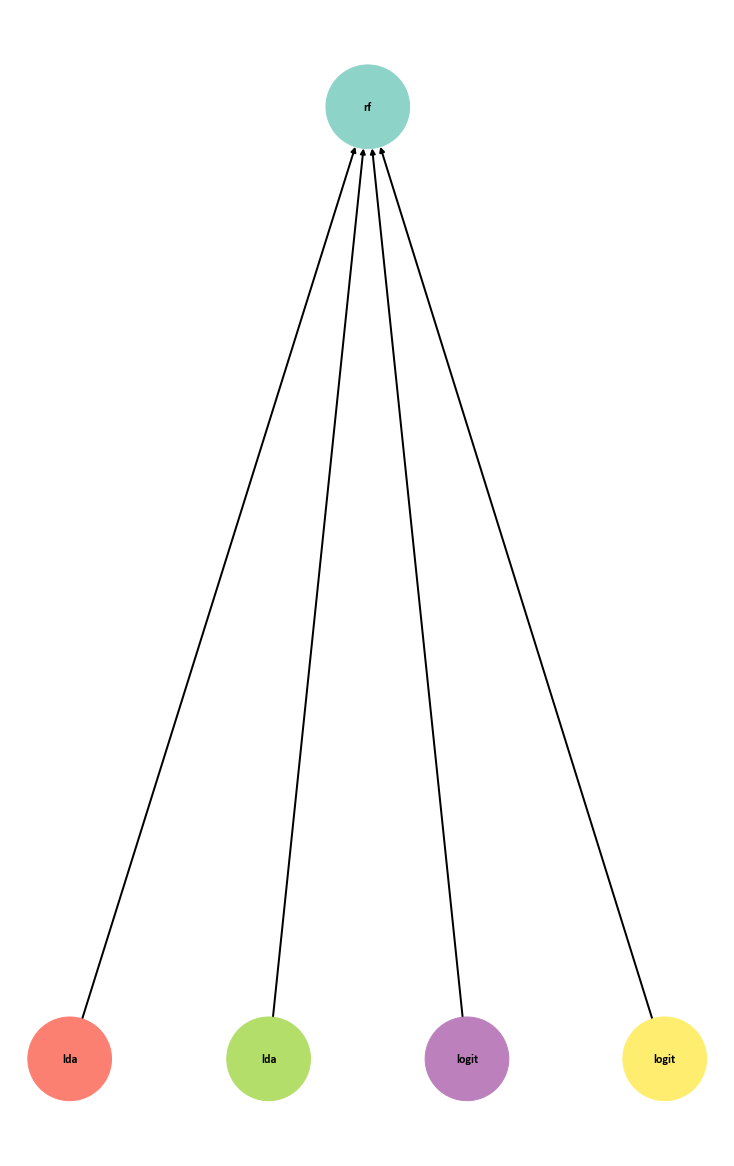

In [2]:
file_path = r'./creditcard.csv'

file_path_first = balance_class(file_path)

train_file_path, test_file_path = create_multi_clf_examples_from_excel(file_path_first)

fitted_model = get_model(train_file_path)

ComposerVisualiser.visualise(fitted_model, save_path = f'./model_done_2.png')
test_data = InputData.from_csv(test_file_path)
roc_auc, p, r, a = validate_model_quality(fitted_model, file_path)
print(f'ROC AUC metric is {roc_auc}, \nPRECISION is {p}, \nRECALL is {r}, \nACCURACY is {a}')

Error in chain assessment during composition: Invalid chain configuration: Chain has incorrect models positions. Continue.
Error in chain assessment during composition: Invalid chain configuration: Chain has incorrect models positions. Continue.
Generation num: 0
spent time: 10.0 min
Best metric is -0.978057
Generation num: 1
spent time: 14.9 min
Best metric is -0.978057
Generation num: 2
spent time: 17.6 min
Best metric is -0.978057
Generation num: 3
spent time: 19.2 min
Best metric is -0.978057
Generation num: 4
spent time: 20.3 min
Best metric is -0.978057
Generation num: 5
spent time: 21.4 min
Best metric is -0.979054
Generation num: 6
spent time: 22.8 min
Best metric is -0.979054
Generation num: 7
spent time: 24.3 min
Best metric is -0.979054
Generation num: 8
spent time: 26.0 min
Best metric is -0.979054
Generation num: 9
spent time: 27.9 min
Best metric is -0.979054
Generation num: 10
spent time: 29.6 min
Best metric is -0.979054
Generation num: 11
spent time: 31.2 min
Best metr

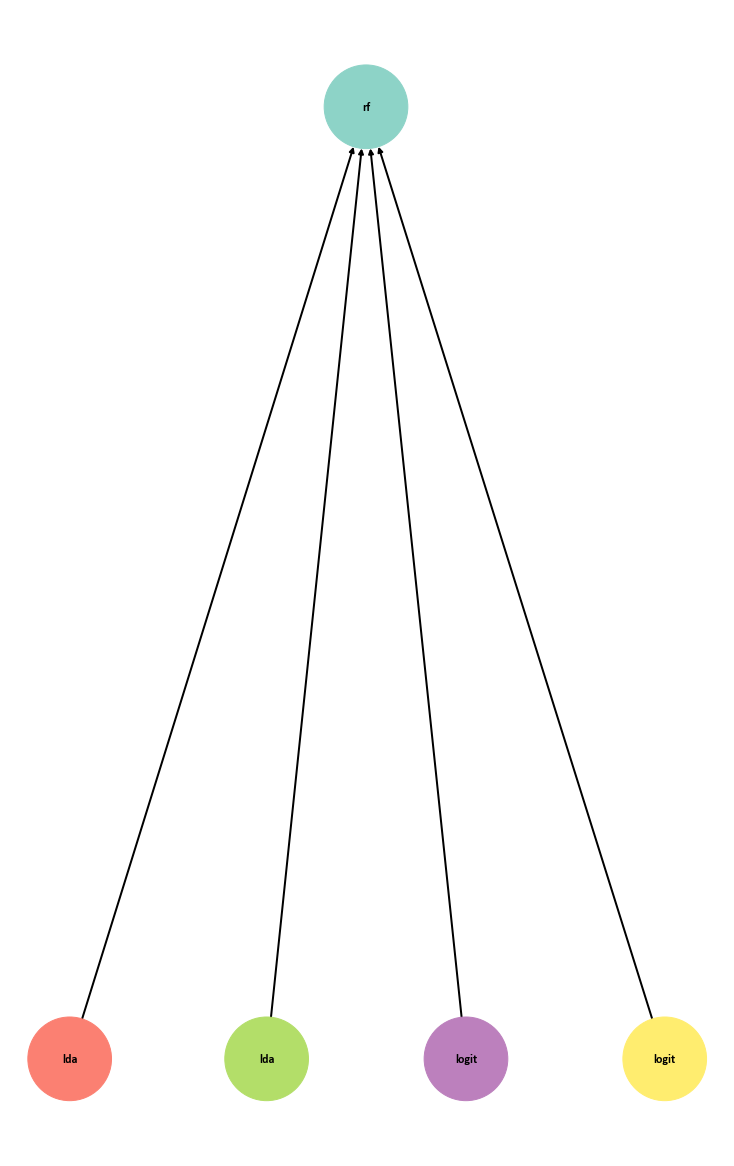

In [3]:
file_path = r'./creditcard.csv'

file_path_first = balance_class(file_path)

train_file_path, test_file_path = create_multi_clf_examples_from_excel(file_path_first)

fitted_model = get_model(train_file_path)

ComposerVisualiser.visualise(fitted_model, save_path = f'./model_done_2.png')

test_data = InputData.from_csv(file_path)

roc_auc, p, r, a = validate_model_quality(fitted_model, file_path)

print(f'ROC AUC metric is {roc_auc}, \nPRECISION is {p}, \nRECALL is {r}, \nACCURACY is {a}')

In [4]:
test_data = InputData.from_csv(file_path)
roc_auc, p, r, a = validate_model_quality(fitted_model, file_path)
print(f'ROC AUC metric is {roc_auc}, \nPRECISION is {p}, \nRECALL is {r}, \nACCURACY is {a}')

ROC AUC metric is 0.9871206168184292, 
PRECISION is 0.030925829875518673, 
RECALL is 0.9695121951219512, 
ACCURACY is 0.9474661788509412


In [28]:
from sklearn.metrics import roc_auc_score 
def apply_model_to_data(model: Chain, data_path: str):
    
    dataset_to_validate = InputData.from_csv(data_path)
    
    predicted_labels = model.predict(dataset_to_validate).predict

    
    roc_auc_st = roc_auc_score(y_true=dataset_to_validate.target,y_score=predicted_labels.round())
                              
    p = precision_score(y_true=dataset_to_validate.target,y_pred=predicted_labels.round())
    r = recall_score(y_true=dataset_to_validate.target, y_pred=predicted_labels.round())
    a = accuracy_score(y_true=dataset_to_validate.target, y_pred=predicted_labels.round())
    
    return roc_auc_st, p, r, a

In [29]:
roc_auc, p, r, a = apply_model_to_data(fitted_model, file_path)
print(f'ROC AUC metric is {roc_auc}, \nPRECISION is {p}, \nRECALL is {r}, \nACCURACY is {a}')

ROC AUC metric is 0.9584701119464284, 
PRECISION is 0.030925829875518673, 
RECALL is 0.9695121951219512, 
ACCURACY is 0.9474661788509412


In [12]:
roc_auc, p, r, a = validate_model_quality(fitted_model, file_path)
print(f'ROC AUC metric is {roc_auc}, \nPRECISION is {p}, \nRECALL is {r}, \nACCURACY is {a}')

ROC AUC metric is 0.9932828747285767, 
PRECISION is 0.04692715491851561, 
RECALL is 0.9715447154471545, 
ACCURACY is 0.9658646030469756
